<a href="https://colab.research.google.com/github/CharlyAguirre/ADA-informes/blob/main/MergeSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de ordenamiento

**Entrada:** Un arreglo de números que puede o no estar ordenados [x1, x2, x3, ..., xn]

**Salida:** Un nuevo arreglo con los mismos datos de entrada, pero ordenados según de menor a mayor [x1 ≤ x2 ≤ x3 ≤ ... ≤ xn]

Los problemas de ordenamiento son muy recurrentes al momento de plantear la solución a un problema, pero ¿por qué? Estos son planteados con el fin de mantener un orden en la solución, también para una correcta y fácil manipulación de estos datos al momento de ser utilizados para la resolución de un problema mayor.




# 2. MergeSort

Este algoritmo de ordenamiento se basa en la primicia de divide y vencerás, este algoritmo se utiliza a si mismo de manera recursiva para poder realizar el ordenamiento del arreglo que se le es entregado, también contiene dentro una función llamada merge la cual se encarga de realizar comparaciones y combinar arreglos.

## 2.1 Descripción del MergeSort

Como se mencionó anteriormente el MergeSort se llama de manera recursiva, pero para que sirve esto te puedes preguntar, esto sirve ya que el MergeSort va dividiendo el arreglos de manera que lo convierte en dos nuevo arreglos de largo n/2, esto se repite sucesivamente hasta que se llega a unos arreglos de largo = 1. 

En la siguiente imagen se puede observar con más claridad el cómo se va dividiendo el arreglo.

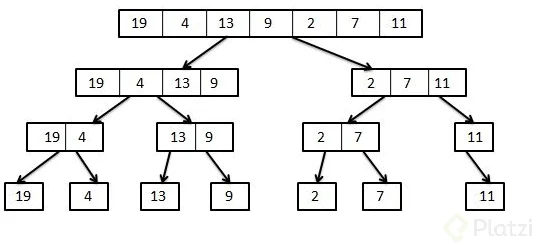

Luego de esto es llamada la función merge para que empiece a combinar y ordenar de menor a mayor los arreglos ya ordenados que se le entregan desde los que tienen largo 1 hasta llegar al largo n, en la siguiente imagen se puede observar con más claridad el cómo se van combinando los arreglos que le son entregados a la función merge.

Como observación puedo acotar que un arreglo de largo 1 se considera que esta ordenado por lo que se dice que la función merge solo recibe arreglos ordenados.




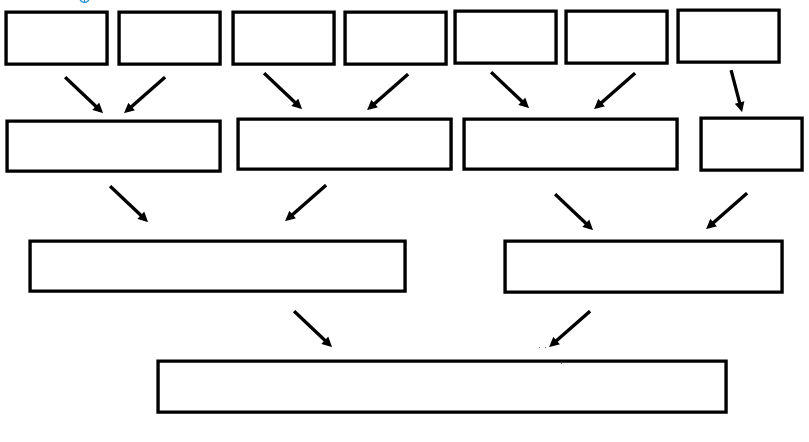

## 2.2 Ejemplo paso a paso del MergeSort

Para empezar, tomaremos de ejemplo el arreglo [4,9,2,1,7,6].

Lo primero que el MergeSort es dividir este arreglo en 2 dejándolo de la siguiente manera.

Arreglo de la izquierda: [4,9,2]		Arreglo de la derecha: [1,7,6]

Ahora estos dos arreglos se le pasan de nuevo al MergeSort y este los divide en 2 nueva mente quedando de esta manera.

Arreglo 1: [4,9,2]	Arreglo de la izquierda: [4,9]		Arreglo de la derecha:[2
]
Como este proceso se tiene que repetir hasta llegar a los a sub-arreglo de largo 1 solo basta repetir esto una vez en los arreglos de la izquierda.

Arreglo 2: [4,9]		Arreglo de la izquierda: [4]		Arreglo de la derecha:[9]

Llegados a este punto el algoritmo empieza a llamar a la función merge para empezar a combinar estos sub-arreglos, para combinarlos primero los compara para observar cual es el mayor y cuál es el menor. 

 [4] < [9] al observar esto la función merge devuelve [4,9]

Ahora volvemos donde quedo el arreglo [2] y la función merge empieza de nuevo.
[4] < [2] compara. Al no ser real los intercambia y combina los arreglos quedando: [2,4,9].

Esto fue por el lado de la izquierda de la primera división, por el lado de la dereche haciendo este mismo proceso llegaría un sub-arreglo de ya ordenado: [1,6,7].

Ahora la función merge es llamada de nuevo y empieza a comparar los datos.
Arreglo Izquierdo: [2,4,9]	Arreglo derecho: [1,6,7]

[2] < [1] NO **->**Arreglo: [1]

[2] < [6] SI **->** Arreglo: [1,2]

[6] < [4] NO **->** Arreglo: [1,2,4]

[6] < [9] SI **->** Arreglo: [1,2,4,6]

[9] < [7] NO **->** Arreglo: [1,2,4,6,7,9] (al ser la última comparación posible el nueve es el último dato)

Arreglo de entrada: [4,9,2,1,7,6]

Arreglo de Salida: [1,2,4,6,7,9]




## 2.3 Codigo del MergeSort




In [165]:
import random
from termcolor import colored


def MergeSort(arreglo, cont, verbose = False):
  
  #variable que parte el arreglo que se le entrega al mergeSort a la mitad
  mitad = len(arreglo) // 2

  
  
  """condicion para deterner la recursion al momento de llegar a len(arreglo) = 1
  sin esta condicion entra en un bucle infinito re recursividad"""
  if len(arreglo) < 2:
      return arreglo, cont

  if(verbose == True):

    print("Arreglo izquierdo: ", arreglo[:mitad])

  """llamando de forma recursiva al mergeSort para dividir el arreglo hasta que 
  llegen a len = 1"""
  arregloDere, cont = MergeSort(arreglo[:mitad], cont, verbose)

  if(verbose == True):
    print("Arreglo derecho: ", arreglo[mitad:])

    print(" ")

  arregloIzqui, cont = MergeSort(arreglo[mitad:], cont, verbose)
  
  #llamado a la funcion merge para que junte los dos arreglos ya ordenados en uno solo
  arreglo, cont = merge(arregloDere, arregloIzqui, cont, verbose)

  return arreglo, cont

def merge(arregloDere, arregloIzqui, cont, verbose):

    
  #indices para las comparaciones
  i,j = 0,0

  #nuevo arreglo donde se combinan los dos arreglos entregados
  arreglo = [] 

  if(verbose == True):

    print("Los arreglos a combinar son ", arregloDere, arregloIzqui)

 
  #while que para realizar las comparaciones para las combinaciones de arreglos
  while(i < len(arregloDere) and j < len(arregloIzqui)):

    if (arregloDere[i] < arregloIzqui[j]):

      arreglo.append(arregloDere[i])
      i += 1
      cont +=1 

      if(verbose == True):

        print(colored(f"{str(arreglo)[1:-1]}","blue"))

    else:
        
      arreglo.append(arregloIzqui[j])
      j += 1
      cont +=1

      if(verbose == True):

        print(colored(f"{str(arreglo)[1:-1]}","blue"))


  # agregamos los datos sobrantes que pertenecen a un arreglo ya ordenado (no se comparan)
  arreglo += arregloDere[i:]
  arreglo += arregloIzqui[j:]

  """Condicion para mostar los ultimos datos agregados al arreglo cuando solo quedan 
  datos para agregar de un solo arreglo """
  if(verbose == True):

    print(colored(f"{str(arreglo)[1:-1]}","blue"))

    print(" ")

 
  # Retornamos el resultados
  return arreglo, cont

arregloInicial = [4,9,12,3,5,1]
cont = 0
print("Entrada: ",arregloInicial)

arregloOrdenado, cont = MergeSort(arregloInicial, cont)

print("Salida : ",arregloOrdenado)
print("Comparaciones : ", cont)

Entrada:  [4, 9, 12, 3, 5, 1]
Salida :  [1, 3, 4, 5, 9, 12]
Comparaciones :  9


## 2.4 Ejecución del algoritmo MergeSort paso a paso (verbose = True)

Con la variable verbose = true podemos observar paso a paso como es que se desarrolla el algoritmo.

In [167]:
import random
arreglo = random.sample(range(1, 100), 6)
cont = 0

print("Arreglo de entrada : ", arreglo)

arreglo,cont= MergeSort(arreglo, cont, verbose=True)

print("Arreglo de salida : ", arreglo)

print("Comparaciones realizadas : ", cont)



Arreglo de entrada :  [83, 3, 94, 84, 86, 87]
 
Arreglo izquierdo:  [83, 3, 94]
 
Arreglo izquierdo:  [83]
Arreglo derecho:  [3, 94]
 
Arreglo izquierdo:  [3]
Arreglo derecho:  [94]
Los arreglos a combinar son  [3] [94]
3
3, 94
 
Los arreglos a combinar son  [83] [3, 94]
3
3, 83
3, 83, 94
 
Arreglo derecho:  [84, 86, 87]
 
Arreglo izquierdo:  [84]
Arreglo derecho:  [86, 87]
 
Arreglo izquierdo:  [86]
Arreglo derecho:  [87]
Los arreglos a combinar son  [86] [87]
86
86, 87
 
Los arreglos a combinar son  [84] [86, 87]
84
84, 86, 87
 
Los arreglos a combinar son  [3, 83, 94] [84, 86, 87]
3
3, 83
3, 83, 84
3, 83, 84, 86
3, 83, 84, 86, 87
3, 83, 84, 86, 87, 94
 
Arreglo de salida :  [3, 83, 84, 86, 87, 94]
Comparaciones realizadas :  10


En el paso a paso del algoritmo podemos ver cómo va dividiendo el arreglo de entrada hasta el punto de que tiene solo arreglos de largo 1. Una vez llegado a ese punto entra en acción la función merge y empieza a combinar estos arreglos hasta volver al largo inicial del arreglo de entrada.

Los números azules que se observan son las iteraciones que hace la función merge para poder combinar los dos arreglos que le son entregados. 